## Setup

In [12]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize

import Bargaining as brg
import bargaining_algorithm as ba
from figures import *
from checks import *

import numpy as np
import numba as nb
import scipy.optimize as optimize
import copy

from EconModel import EconModelClass
from consav.grids import nonlinspace
from consav import linear_interp, linear_interp_1d
from consav import quadrature

#plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})

# c++ settings
do_cpp = True
do_compile = True
threads = 16

# Load and save settings
load_model1 = True
load_model2 = True
save_model1 = True
save_model2 = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Compile C++ files

In [2]:
# compile c++ files
if do_cpp & do_compile:
    model = brg.HouseholdModelClass(par={'do_cpp':do_cpp,'num_Ctot':100})
    model.link_to_cpp(force_compile=do_compile)

### Model 1

User settings

In [4]:
# Set name 
name        = 'model 4 cppbrg'
latexname   = ''

# Set parameters
par1        = {
              'T':10,
              'div_A_share':0.3,
              'sigma_love':0.0,
              
              'do_cpp': False,
              'threads':threads,
              'brg_algo':3
              }

Setup model1

In [5]:
# Setup model
if load_model1:
    model1 = brg.HouseholdModelClass(name=name, load=True)
    for key in par1.keys():
        par1[key] = getattr(model1.par,key)
else:
    model1 = brg.HouseholdModelClass(name=name, par=par1)
    
model1.link_to_cpp(force_compile=False)
model1.spec = {'latexname':latexname,'par':par1}

Model 2

User settings

In [9]:
# Set name 
name        = 'model 4 pybrg'
latexname   = ''

# Set parameters
par_changes = {
              'brg_algo': 0
              }

Setup model2

In [10]:
# Create par2
par2 = copy.deepcopy(par1)
for key in par_changes.keys():
    par2[key] = par_changes[key]
    
# Setup model
if load_model2:
    model2 = brg.HouseholdModelClass(name=name, load=True)
    for key in par2.keys():
        par2[key] = getattr(model2.par,key)
else:
    model2 = brg.HouseholdModelClass(name=name, par=par2)

model2.link_to_cpp(force_compile=False)
model2.spec = {'latexname':latexname,'par':par2}

### Summary

In [11]:
column1_length = 16
column2_length = 16
column3_length = 16

print(f"{' '*column1_length}|{model1.name.center(column2_length)}|{model2.name.center(column3_length)}|")
print("-"*(column1_length+column2_length+column3_length+3))
for key in [p for p in par1.keys() if p not in par_changes.keys()]:
    print(f"{key.ljust(column1_length)}|{str(par1[key]).center(column2_length)}|{str(par2[key]).center(column3_length)}|")
print("-"*(column1_length+column2_length+column3_length+3))
for key in par_changes.keys():
    print(f"{key.ljust(column1_length)}|{str(par1[key]).center(column2_length)}|{str(par2[key]).center(column3_length)}|")

                | model 4 cppbrg | model 4 pybrg  |
---------------------------------------------------
T               |       10       |       10       |
div_A_share     |      0.3       |      0.3       |
sigma_love      |      0.0       |      0.0       |
do_cpp          |     False      |     False      |
threads         |       16       |       16       |
---------------------------------------------------
brg_algo        |       3        |       0        |


### Solve models

Solve model1

In [13]:
if load_model1==False:
    model1.solve()
if save_model1:
    model1.save()

Solve model2

In [14]:
if load_model2==False:
    model2.solve()
if save_model2:
    model2.save()

## Calculate differences in the solutions

Absolute differences

In [15]:
sol_max_abs_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=False)
print_namespace(sol_max_abs_diff)

Vw_single: nan
Vm_single: nan
Cw_priv_single: nan
Cm_priv_single: nan
Cw_pub_single: nan
Cm_pub_single: nan
Cw_tot_single: nan
Cm_tot_single: nan
Vw_trans_single: nan
Vm_trans_single: nan
Cw_priv_trans_single: nan
Cm_priv_trans_single: nan
Cw_pub_trans_single: nan
Cm_pub_trans_single: nan
Cw_tot_trans_single: nan
Cm_tot_trans_single: nan
Vw_couple: nan
Vm_couple: nan
Cw_priv_couple: nan
Cm_priv_couple: nan
C_pub_couple: nan
C_tot_couple: nan
Vw_remain_couple: nan
Vm_remain_couple: nan
Cw_priv_remain_couple: nan
Cm_priv_remain_couple: nan
C_pub_remain_couple: nan
C_tot_remain_couple: nan
Sw: nan
Sm: nan
power_idx: 0
power: 0.0
savings_vec: 0.0
Vw_plus_vec: 0.0
Vm_plus_vec: 0.0
marg_V_couple: 0.0
marg_V_remain_couple: 0.0
EmargU_pd: 0.0
C_tot_pd: 0.0
M_pd: 0.0
pre_Ctot_Cw_priv: nan
pre_Ctot_Cm_priv: nan
pre_Ctot_C_pub: nan
solution_time: 0.0


c:\Users\zbk883\OneDrive - University of Copenhagen\Documents\projects\household_guide\HouseholdBargainingGuide\checks.py:64: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(np.abs(variable))


Relative differences

In [13]:
sol_max_rel_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=True)
print_namespace(sol_max_rel_diff)

Vw_single: 0.0
Vm_single: 0.0
Cw_priv_single: 0.0
Cm_priv_single: 0.0
Cw_pub_single: 0.0
Cm_pub_single: 0.0
Cw_tot_single: 0.0
Cm_tot_single: 0.0
Vw_trans_single: 0.0
Vm_trans_single: 0.0
Cw_priv_trans_single: 0.0
Cm_priv_trans_single: 0.0
Cw_pub_trans_single: 0.0
Cm_pub_trans_single: 0.0
Cw_tot_trans_single: 0.0
Cm_tot_trans_single: 0.0
Vw_couple: 1.3342946172817436e-08
Vm_couple: 1.923805061423833e-08
Cw_priv_couple: 7.673593372771692e-05
Cm_priv_couple: 1.113066758461786e-05
C_pub_couple: 1.0219620866432842e-05
C_tot_couple: 1.0209605857298123e-05
Vw_remain_couple: 2.3441282017389113e-07
Vm_remain_couple: 1.2300959052021662e-07
Cw_priv_remain_couple: 1.1456136619504347e-05
Cm_priv_remain_couple: 1.146214895632315e-05
C_pub_remain_couple: 1.145706077872621e-05
C_tot_remain_couple: 1.1456807779013746e-05
Sw: 0.0
Sm: 0.0
power_idx: 0.0
power: 7.766710029092262e-05
savings_vec: 0.0
Vw_plus_vec: 0.0
Vm_plus_vec: 0.0
marg_V_couple: nan
marg_V_remain_couple: nan
EmargU_pd: nan
C_tot_pd: na

## Plot the differences

Specify the variable that index of maximum absolute difference should be based on

In [14]:
variable = 'Vw_remain_couple'

Find index with largest difference

In [44]:
sol_max_abs_diff_idx = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=False)

In [48]:
idx = getattr(sol_max_abs_diff_idx,variable)

(t,iP,iL,iA) = idx
print(f't = {t}, iP = {iP}, iL = {iL}, iA = {iA}')

t = 3, iP = 0, iL = 21, iA = 2


### Bargaining power

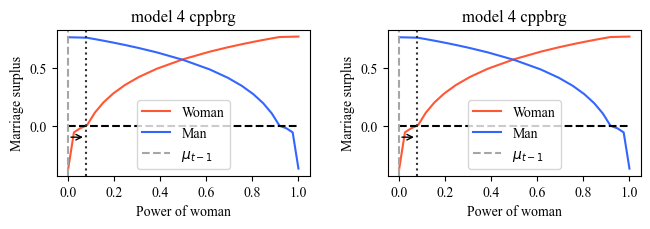

In [ ]:
model_plot([model1,model2],plot_surplus,t,iP,iL,iA, subtitles=[model1.name,model2.name])

### Values

Plot female values

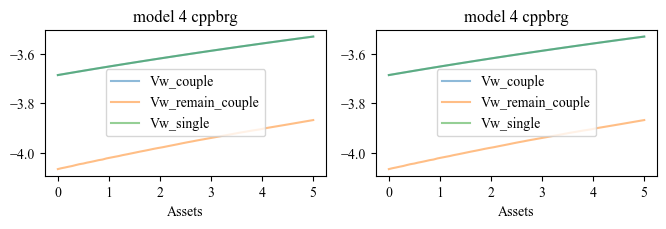

In [50]:
model_plot([model1,model2], plot_var_over_assets, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

Plot male values

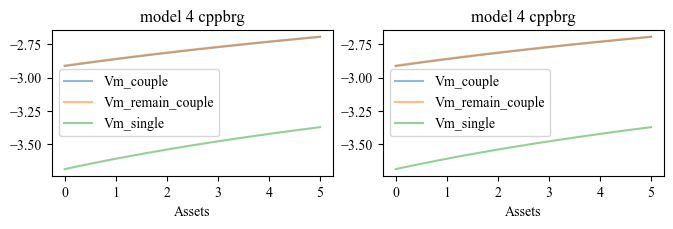

In [51]:
model_plot([model1,model2], plot_var_over_assets, ['Vm_couple','Vm_remain_couple','Vm_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

### Consumption

Plot female consumption

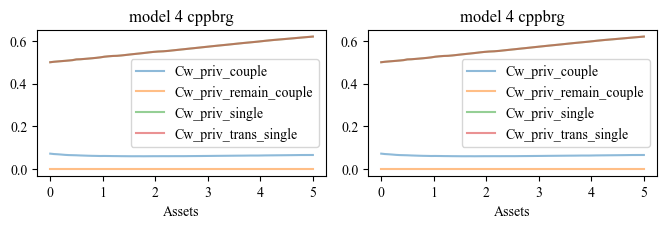

In [52]:
model_plot([model1,model2], plot_var_over_assets, ['Cw_priv_couple','Cw_priv_remain_couple','Cw_priv_single', 'Cw_priv_trans_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

Plot male consumption

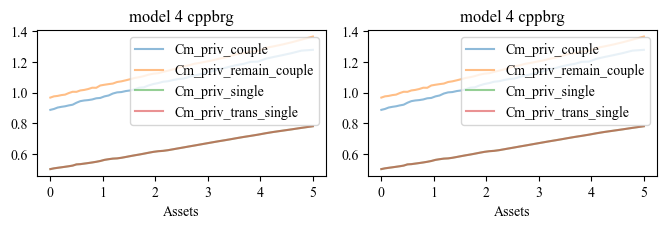

In [53]:
model_plot([model1,model2], plot_var_over_assets, ['Cm_priv_couple','Cm_priv_remain_couple','Cm_priv_single', 'Cm_priv_trans_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])

Plot public consumption

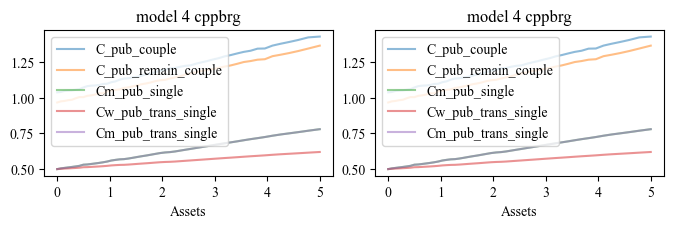

In [55]:
model_plot([model1,model2], plot_var_over_assets, ['C_pub_couple','C_pub_remain_couple','Cm_pub_single', 'Cw_pub_trans_single', 'Cm_pub_trans_single'], idx, grid_points=False, subtitles=[model1.name, model2.name ])